In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Carga y transformaci√≥n de datos - Noviembre 2023
Se va a cargar el archivo `consolidado-de-salidas-sistema-troncal-por-franja-horaria-noviembre-2023.csv` desde la carpeta `week_02`.
Se preparar√° un dataframe **long** con columnas: Fecha, D√≠a de la semana, Tipo de d√≠a, TotalUsuarios.


In [14]:
import pandas as pd
import numpy as np

file_path_2023 = '/content/drive/MyDrive/CTVII;BASE DE DATOS Y ANALITICA R03-20250815T232505Z-1-001/CTVII_BASE DE DATOS Y ANALITICA R03/week_03-20250822T231508Z-1-001/week_03/consolidado-de-salidas-sistema-troncal-por-franja-horaria-noviembre-2024.csv'
df_2023 = pd.read_csv(file_path_2023, sep=';', encoding='latin-1')

id_vars_2023 = ['L√≠nea','Estaci√≥n','Acceso de Estaci√≥n','MES','INTERVALO','Total general','Unnamed: 37','Unnamed: 38']
daily_cols_2023 = [c for c in df_2023.columns if c.startswith('D√çA ')]

df_2023_long = df_2023.melt(id_vars=id_vars_2023, value_vars=daily_cols_2023, var_name='DiaStr', value_name='TotalUsuarios')
df_2023_long['DiaMes'] = df_2023_long['DiaStr'].str.replace('D√çA ','').astype(int)
df_2023_long['TotalUsuarios'] = pd.to_numeric(df_2023_long['TotalUsuarios'], errors='coerce').fillna(0)
df_2023_long['Fecha'] = pd.to_datetime('2023-11-' + df_2023_long['DiaMes'].astype(str), errors='coerce')
df_2023_long.dropna(subset=['Fecha'], inplace=True)
df_2023_long['DiaSemana'] = df_2023_long['Fecha'].dt.day_name()
df_2023_long['TipoDia'] = df_2023_long['DiaSemana'].apply(lambda x: 'Fin de Semana' if x in ['Saturday','Sunday'] else 'D√≠a Laboral')

weekday_map = {'Monday':'Lunes','Tuesday':'Martes','Wednesday':'Mi√©rcoles','Thursday':'Jueves','Friday':'Viernes','Saturday':'S√°bado','Sunday':'Domingo'}
df_2023_long['DiaSemana'] = df_2023_long['DiaSemana'].map(weekday_map)

df_2023_long.head()


/tmp/ipython-input-1739334996.py:5: DtypeWarning: Columns (0,1,2,3,4,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2023 = pd.read_csv(file_path_2023, sep=';', encoding='latin-1')


L√≠nea                 Estaci√≥n  \
0  (11) Zona K Calle 26  (06000) Portal Eldorado   
1  (11) Zona K Calle 26  (06000) Portal Eldorado   
2  (11) Zona K Calle 26  (06000) Portal Eldorado   
3  (11) Zona K Calle 26  (06000) Portal Eldorado   
4  (11) Zona K Calle 26  (06000) Portal Eldorado   

                                  Acceso de Estaci√≥n        MES INTERVALO  \
0  (01) PLAT2 ALIM-DESAL FONTIB√ìN/FONTIB√ìN CENTRO...  NOVIEMBRE     00:00   
1  (01) PLAT2 ALIM-DESAL FONTIB√ìN/FONTIB√ìN CENTRO...  NOVIEMBRE     00:15   
2  (01) PLAT2 ALIM-DESAL FONTIB√ìN/FONTIB√ìN CENTRO...  NOVIEMBRE     00:30   
3  (01) PLAT2 ALIM-DESAL FONTIB√ìN/FONTIB√ìN CENTRO...  NOVIEMBRE     00:45   
4  (01) PLAT2 ALIM-DESAL FONTIB√ìN/FONTIB√ìN CENTRO...  NOVIEMBRE     01:00   

   Total general  Unnamed: 37  Unnamed: 38  DiaStr  TotalUsuarios  DiaMes  \
0            0.0          NaN          NaN  D√çA 01            0.0       1   
1            0.0          NaN          NaN  D√çA 01            0.0       1   
2            0.0          NaN          NaN  D√çA 01            0.0       1   
3            0.0          NaN          NaN  D√çA 01            0.0       1   
4            0.0          NaN          NaN  D√çA 01            0.0       1   

       Fecha  DiaSemana      TipoDia  
0 2023-11-01  Mi√©rcoles  D√≠a Laboral  
1 2023-11-01  Mi√©rcoles  D√≠a Laboral  
2 2023-11-01  Mi√©rcoles  D√≠a Laboral  
3 2023-11-01  Mi√©rcoles  D√≠a Laboral  
4 2023-11-01  Mi√©rcoles  D√≠a Laboral

# Carga y transformaci√≥n de datos - Noviembre 2024
Se cargar√° el archivo `consolidado-de-salidas-sistema-troncal-por-franja-horaria-noviembre-2024.csv` desde la carpeta `week_03`.
Se prepara un dataframe long con las mismas columnas que 2023.


In [16]:
file_path_2024 = '/content/drive/MyDrive/CTVII;BASE DE DATOS Y ANALITICA R03-20250815T232505Z-1-001/CTVII_BASE DE DATOS Y ANALITICA R03/week_03-20250822T231508Z-1-001/week_03/consolidado-de-salidas-sistema-troncal-por-franja-horaria-noviembre-2024.csv'
df_2024 = pd.read_csv(file_path_2024, sep=';', encoding='latin-1')

id_vars_2024 = ['L√≠nea','Estaci√≥n','Acceso de Estaci√≥n','MES','INTERVALO','Total general','Unnamed: 37','Unnamed: 38']
daily_cols_2024 = [c for c in df_2024.columns if c.startswith('D√çA ')]

df_2024_long = df_2024.melt(id_vars=id_vars_2024, value_vars=daily_cols_2024, var_name='DiaStr', value_name='TotalUsuarios')
df_2024_long['DiaMes'] = df_2024_long['DiaStr'].str.replace('D√çA ','').astype(int)
df_2024_long['TotalUsuarios'] = pd.to_numeric(df_2024_long['TotalUsuarios'], errors='coerce').fillna(0)
df_2024_long['Fecha'] = pd.to_datetime('2024-11-' + df_2024_long['DiaMes'].astype(str), errors='coerce')
df_2024_long.dropna(subset=['Fecha'], inplace=True)
df_2024_long['DiaSemana'] = df_2024_long['Fecha'].dt.day_name()
df_2024_long['TipoDia'] = df_2024_long['DiaSemana'].apply(lambda x: 'Fin de Semana' if x in ['Saturday','Sunday'] else 'D√≠a Laboral')
df_2024_long['DiaSemana'] = df_2024_long['DiaSemana'].map(weekday_map)

df_2024_long.head()


/tmp/ipython-input-1453647914.py:2: DtypeWarning: Columns (0,1,2,3,4,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2024 = pd.read_csv(file_path_2024, sep=';', encoding='latin-1')


L√≠nea                 Estaci√≥n  \
0  (11) Zona K Calle 26  (06000) Portal Eldorado   
1  (11) Zona K Calle 26  (06000) Portal Eldorado   
2  (11) Zona K Calle 26  (06000) Portal Eldorado   
3  (11) Zona K Calle 26  (06000) Portal Eldorado   
4  (11) Zona K Calle 26  (06000) Portal Eldorado   

                                  Acceso de Estaci√≥n        MES INTERVALO  \
0  (01) PLAT2 ALIM-DESAL FONTIB√ìN/FONTIB√ìN CENTRO...  NOVIEMBRE     00:00   
1  (01) PLAT2 ALIM-DESAL FONTIB√ìN/FONTIB√ìN CENTRO...  NOVIEMBRE     00:15   
2  (01) PLAT2 ALIM-DESAL FONTIB√ìN/FONTIB√ìN CENTRO...  NOVIEMBRE     00:30   
3  (01) PLAT2 ALIM-DESAL FONTIB√ìN/FONTIB√ìN CENTRO...  NOVIEMBRE     00:45   
4  (01) PLAT2 ALIM-DESAL FONTIB√ìN/FONTIB√ìN CENTRO...  NOVIEMBRE     01:00   

   Total general  Unnamed: 37  Unnamed: 38  DiaStr  TotalUsuarios  DiaMes  \
0            0.0          NaN          NaN  D√çA 01            0.0       1   
1            0.0          NaN          NaN  D√çA 01            0.0       1   
2            0.0          NaN          NaN  D√çA 01            0.0       1   
3            0.0          NaN          NaN  D√çA 01            0.0       1   
4            0.0          NaN          NaN  D√çA 01            0.0       1   

       Fecha DiaSemana      TipoDia  
0 2024-11-01   Viernes  D√≠a Laboral  
1 2024-11-01   Viernes  D√≠a Laboral  
2 2024-11-01   Viernes  D√≠a Laboral  
3 2024-11-01   Viernes  D√≠a Laboral  
4 2024-11-01   Viernes  D√≠a Laboral

# Comparaci√≥n por tipo de d√≠a
Calcularemos la suma total de usuarios por tipo de d√≠a (laboral vs fin de semana) para 2023 y 2024.


In [20]:
totales_2023 = df_2023_long.groupby('TipoDia')['TotalUsuarios'].sum()
totales_2024 = df_2024_long.groupby('TipoDia')['TotalUsuarios'].sum()

print("Totales Noviembre 2023:\n", totales_2023)
print("\nTotales Noviembre 2024:\n", totales_2024)


Totales Noviembre 2023:
 TipoDia
D√≠a Laboral      4.154942e+07
Fin de Semana    1.501701e+07
Name: TotalUsuarios, dtype: float64

Totales Noviembre 2024:
 TipoDia
D√≠a Laboral      4.423605e+07
Fin de Semana    1.233038e+07
Name: TotalUsuarios, dtype: float64


# Evoluci√≥n diaria
Graficaremos el n√∫mero total de usuarios por d√≠a del mes para 2023 y 2024.


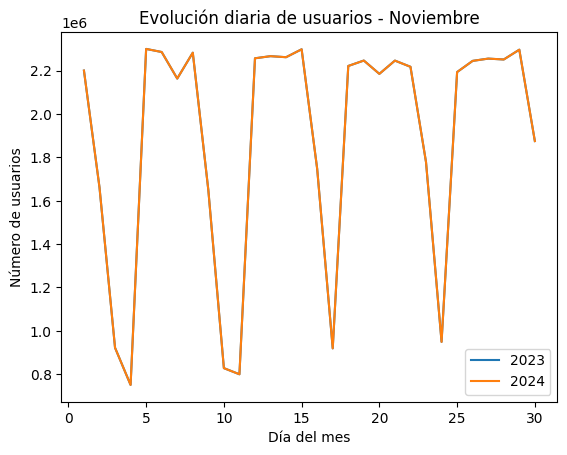

In [18]:
import matplotlib.pyplot as plt

daily_2023 = df_2023_long.groupby('DiaMes')['TotalUsuarios'].sum()
daily_2024 = df_2024_long.groupby('DiaMes')['TotalUsuarios'].sum()

plt.plot(daily_2023.index, daily_2023.values, label='2023')
plt.plot(daily_2024.index, daily_2024.values, label='2024')
plt.title('Evoluci√≥n diaria de usuarios - Noviembre')
plt.xlabel('D√≠a del mes')
plt.ylabel('N√∫mero de usuarios')
plt.legend()
plt.show()


# Estaciones m√°s congestionadas
Analizaremos cu√°les estaciones tienen mayor n√∫mero total de usuarios en 2023 y 2024.


In [21]:
top_estaciones_2023 = df_2023_long.groupby('Estaci√≥n')['TotalUsuarios'].sum().sort_values(ascending=False).head(10)
top_estaciones_2024 = df_2024_long.groupby('Estaci√≥n')['TotalUsuarios'].sum().sort_values(ascending=False).head(10)

print("Top 10 estaciones 2023:\n", top_estaciones_2023)
print("\nTop 10 estaciones 2024:\n", top_estaciones_2024)


Top 10 estaciones 2023:
 Estaci√≥n
(02000) Cabecera Autopista Norte           2100878.438
(05000) Portal Am√©ricas                    2047212.193
(07000) Portal Sur JFK Coop. Financiera    1792895.014
(04000) Cabecera Calle 80                  1689901.961
(03000) Portal Suba                        1625065.700
(08000) Portal Tunal                       1486179.952
(06000) Portal Eldorado                    1461717.054
(09000) Cabecera Usme                      1398260.373
(05100) Banderas P. Central                1188572.000
(10000) Portal 20 de Julio                 1154529.819
Name: TotalUsuarios, dtype: float64

Top 10 estaciones 2024:
 Estaci√≥n
(02000) Cabecera Autopista Norte           2100878.438
(05000) Portal Am√©ricas                    2047212.193
(07000) Portal Sur JFK Coop. Financiera    1792895.014
(04000) Cabecera Calle 80                  1689901.961
(03000) Portal Suba                        1625065.700
(08000) Portal Tunal                       1486179.952
(06000) Por

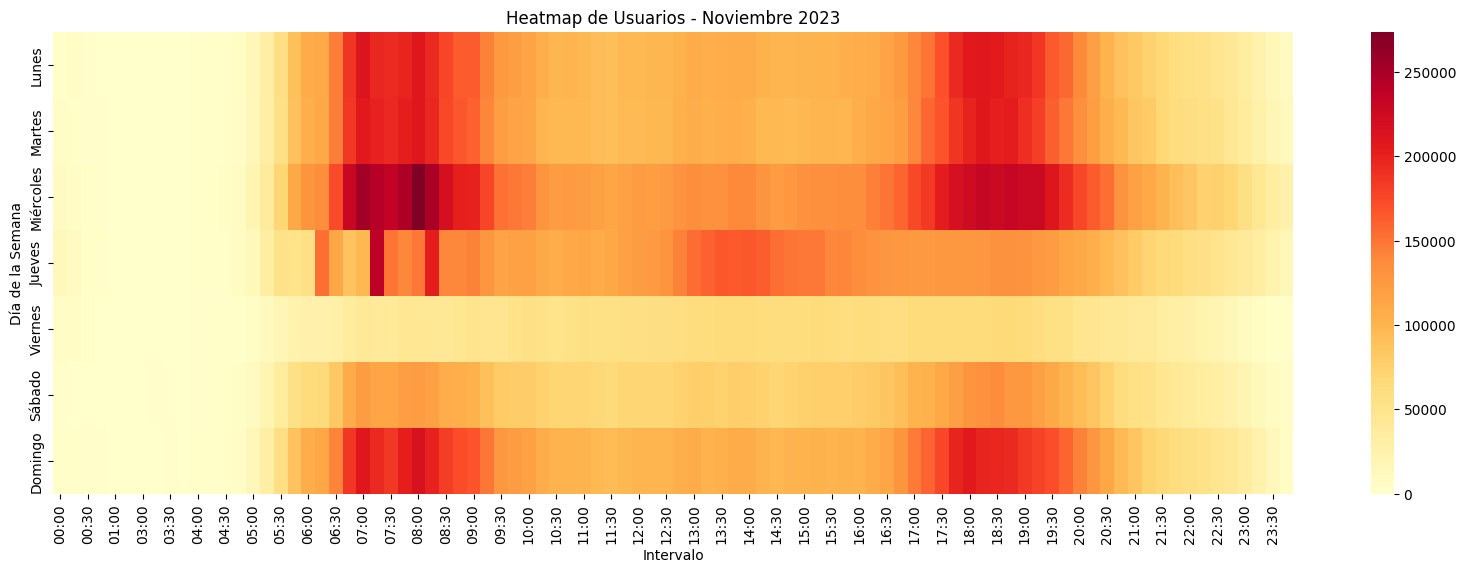

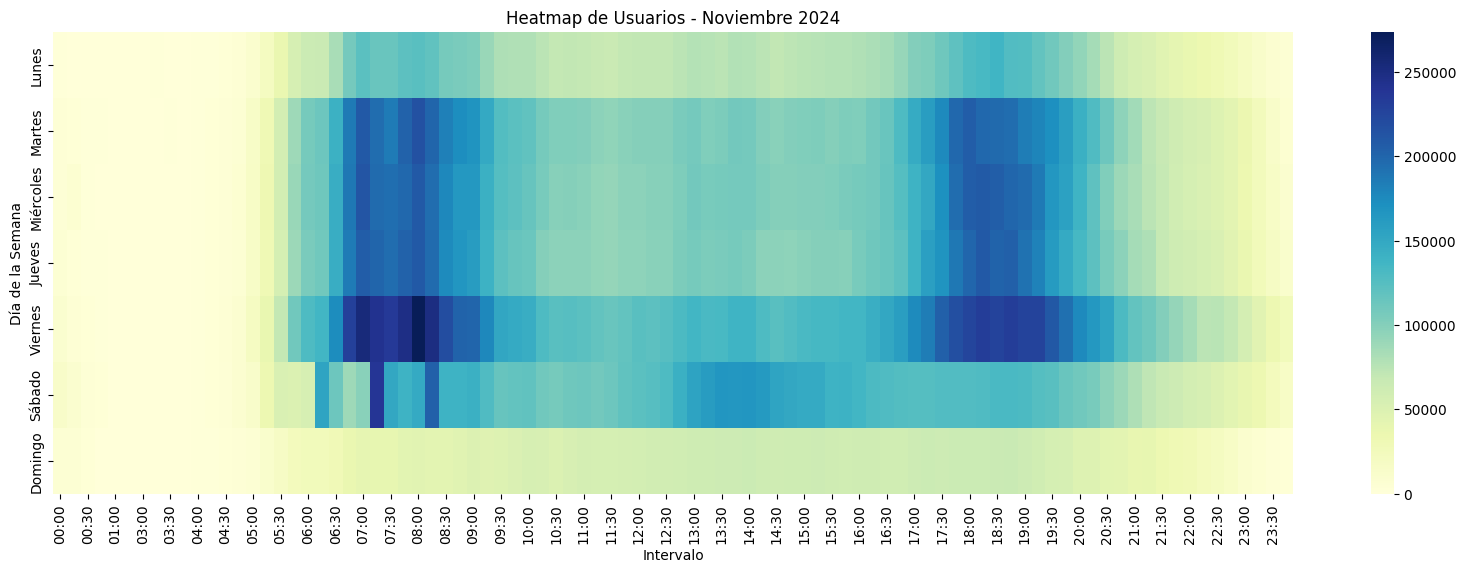

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# === Definir el orden correcto de los d√≠as de la semana ===
dias_orden = ['Lunes','Martes','Mi√©rcoles','Jueves','Viernes','S√°bado','Domingo']

# === Pivot tables con orden correcto ===
pivot_2023 = df_2023_long.pivot_table(
    index='DiaSemana',
    columns='INTERVALO',
    values='TotalUsuarios',
    aggfunc='sum'
).reindex(dias_orden)  # reindex para asegurar orden lunes-domingo

pivot_2024 = df_2024_long.pivot_table(
    index='DiaSemana',
    columns='INTERVALO',
    values='TotalUsuarios',
    aggfunc='sum'
).reindex(dias_orden)

# === Heatmap 2023 ===
plt.figure(figsize=(20,6))
sns.heatmap(pivot_2023, cmap='YlOrRd')
plt.title('Heatmap de Usuarios - Noviembre 2023')
plt.ylabel('D√≠a de la Semana')
plt.xlabel('Intervalo')
plt.show()

# === Heatmap 2024 ===
plt.figure(figsize=(20,6))
sns.heatmap(pivot_2024, cmap='YlGnBu')
plt.title('Heatmap de Usuarios - Noviembre 2024')
plt.ylabel('D√≠a de la Semana')
plt.xlabel('Intervalo')
plt.show()

###Ejercicio:
1. Cree una celda de c√≥digo que genere un heatmap similar al que se visualiza arriba, pero que contenga la diferencia entre 2024 y 2023.

2. Comente en una celda de texto c√≥mo logr√≥ el mapa y qu√© puede inferir de dicha diferencia.

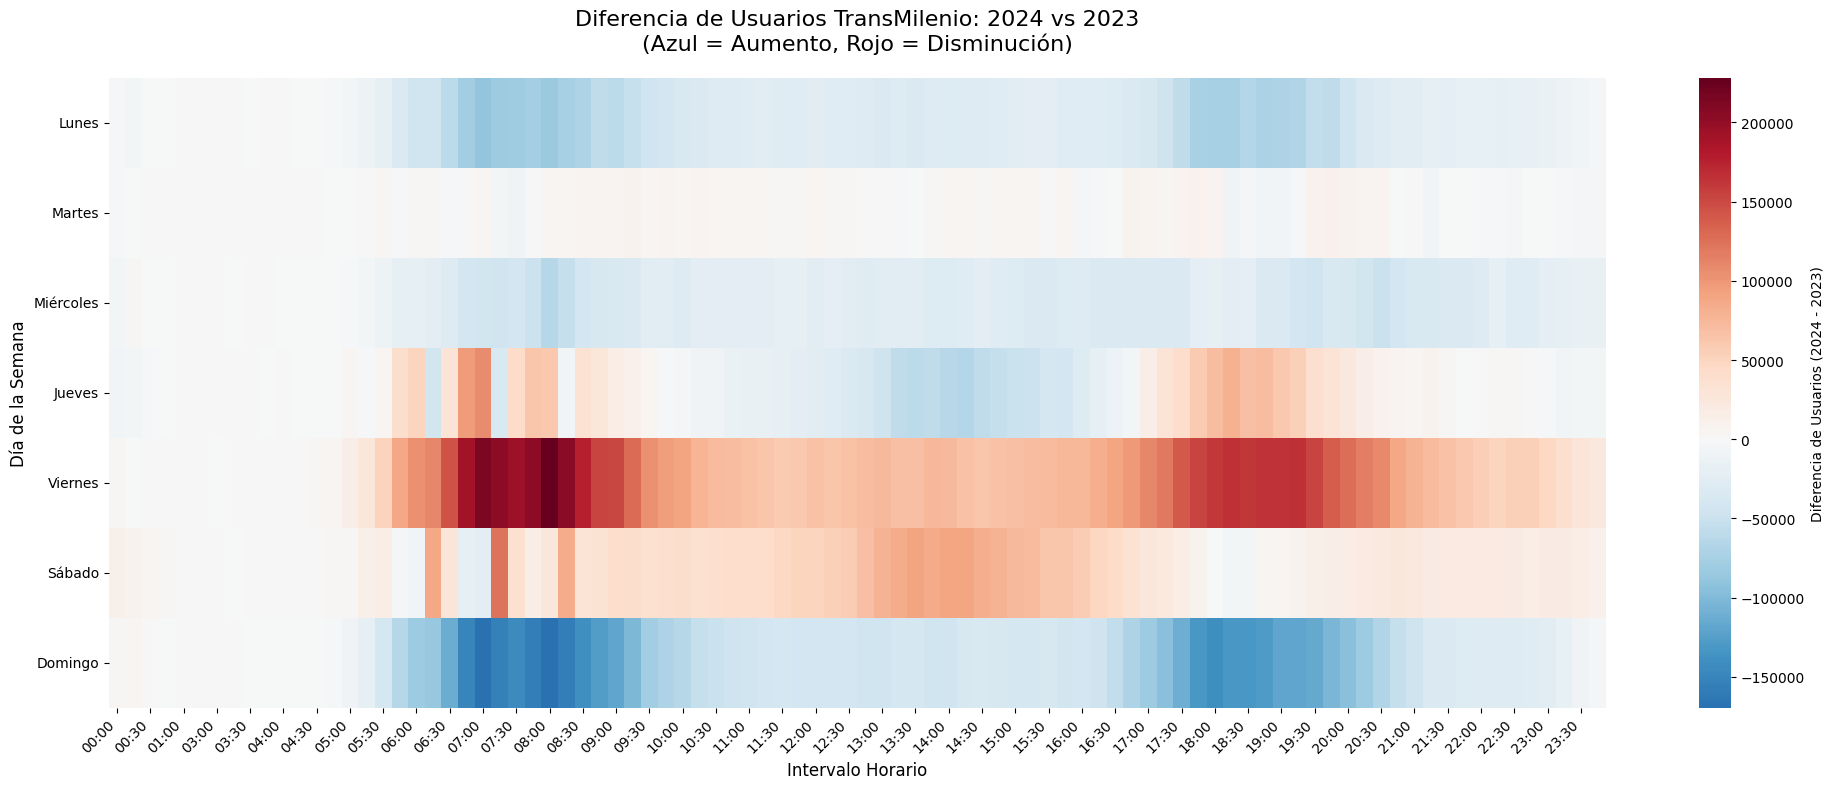

=== ESTAD√çSTICAS DE LA DIFERENCIA (2024 - 2023) ===
Diferencia total de usuarios: -0
Diferencia promedio por intervalo: -0.00
Mayor aumento: 228,159 usuarios
Mayor disminuci√≥n: -169,436 usuarios

=== INTERVALOS CON MAYORES CAMBIOS ===

Top 5 intervalos con mayor AUMENTO:
INTERVALO
00:00    0.0
00:15    0.0
00:30    0.0
00:45    0.0
01:00    0.0
dtype: float64

Top 5 intervalos con mayor DISMINUCI√ìN:
INTERVALO
22:45    0.0
23:30    0.0
23:45    0.0
07:45   -0.0
07:15   -0.0
dtype: float64

=== CAMBIOS POR D√çA DE LA SEMANA ===
üìâ Lunes: -3,029,082 usuarios
üìà Martes: 125,579 usuarios
üìâ Mi√©rcoles: -2,303,151 usuarios
üìà Jueves: 212,940 usuarios
üìà Viernes: 7,680,343 usuarios
üìà S√°bado: 2,745,913 usuarios
üìâ Domingo: -5,432,542 usuarios


In [27]:
# === CELDA DE C√ìDIGO: HEATMAP DIFERENCIA 2024-2023 ===

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# === Definir el orden correcto de los d√≠as de la semana ===
dias_orden = ['Lunes','Martes','Mi√©rcoles','Jueves','Viernes','S√°bado','Domingo']

# === Crear pivot tables para ambos a√±os con orden correcto ===
pivot_2023 = df_2023_long.pivot_table(
    index='DiaSemana',
    columns='INTERVALO',
    values='TotalUsuarios',
    aggfunc='sum'
).reindex(dias_orden)  # reindex para asegurar orden lunes-domingo

pivot_2024 = df_2024_long.pivot_table(
    index='DiaSemana',
    columns='INTERVALO',
    values='TotalUsuarios',
    aggfunc='sum'
).reindex(dias_orden)

# === Calcular la diferencia 2024 - 2023 ===
# Asegurar que ambas tablas tienen las mismas dimensiones
pivot_diferencia = pivot_2024.subtract(pivot_2023, fill_value=0)

# === Crear el heatmap de diferencias ===
plt.figure(figsize=(20, 8))

# Usar colormap divergente para mostrar aumentos (azul) y disminuciones (rojo)
sns.heatmap(
    pivot_diferencia,
    cmap='RdBu_r',  # Colormap divergente: rojo para negativo, azul para positivo
    center=0,       # Centrar en 0 para que sea divergente
    annot=False,    # Sin anotaciones por legibilidad
    fmt='.0f',
    cbar_kws={'label': 'Diferencia de Usuarios (2024 - 2023)'}
)

plt.title('Diferencia de Usuarios TransMilenio: 2024 vs 2023\n(Azul = Aumento, Rojo = Disminuci√≥n)',
          fontsize=16, pad=20)
plt.ylabel('D√≠a de la Semana', fontsize=12)
plt.xlabel('Intervalo Horario', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# === An√°lisis adicional: Estad√≠sticas de la diferencia ===
print("=== ESTAD√çSTICAS DE LA DIFERENCIA (2024 - 2023) ===")
print(f"Diferencia total de usuarios: {pivot_diferencia.sum().sum():,.0f}")
print(f"Diferencia promedio por intervalo: {pivot_diferencia.mean().mean():,.2f}")
print(f"Mayor aumento: {pivot_diferencia.max().max():,.0f} usuarios")
print(f"Mayor disminuci√≥n: {pivot_diferencia.min().min():,.0f} usuarios")

# === Identificar intervalos con mayores cambios ===
print("\n=== INTERVALOS CON MAYORES CAMBIOS ===")

# Sumar por intervalo (columnas)
cambios_por_intervalo = pivot_diferencia.sum(axis=0).sort_values(ascending=False)
print("\nTop 5 intervalos con mayor AUMENTO:")
print(cambios_por_intervalo.head().round(0))

print("\nTop 5 intervalos con mayor DISMINUCI√ìN:")
print(cambios_por_intervalo.tail().round(0))

# === Sumar por d√≠a de la semana ===
cambios_por_dia = pivot_diferencia.sum(axis=1)
print("\n=== CAMBIOS POR D√çA DE LA SEMANA ===")
for dia in dias_orden:
    cambio = cambios_por_dia[dia]
    status = "üìà" if cambio > 0 else "üìâ" if cambio < 0 else "‚û°Ô∏è"
    print(f"{status} {dia}: {cambio:,.0f} usuarios")

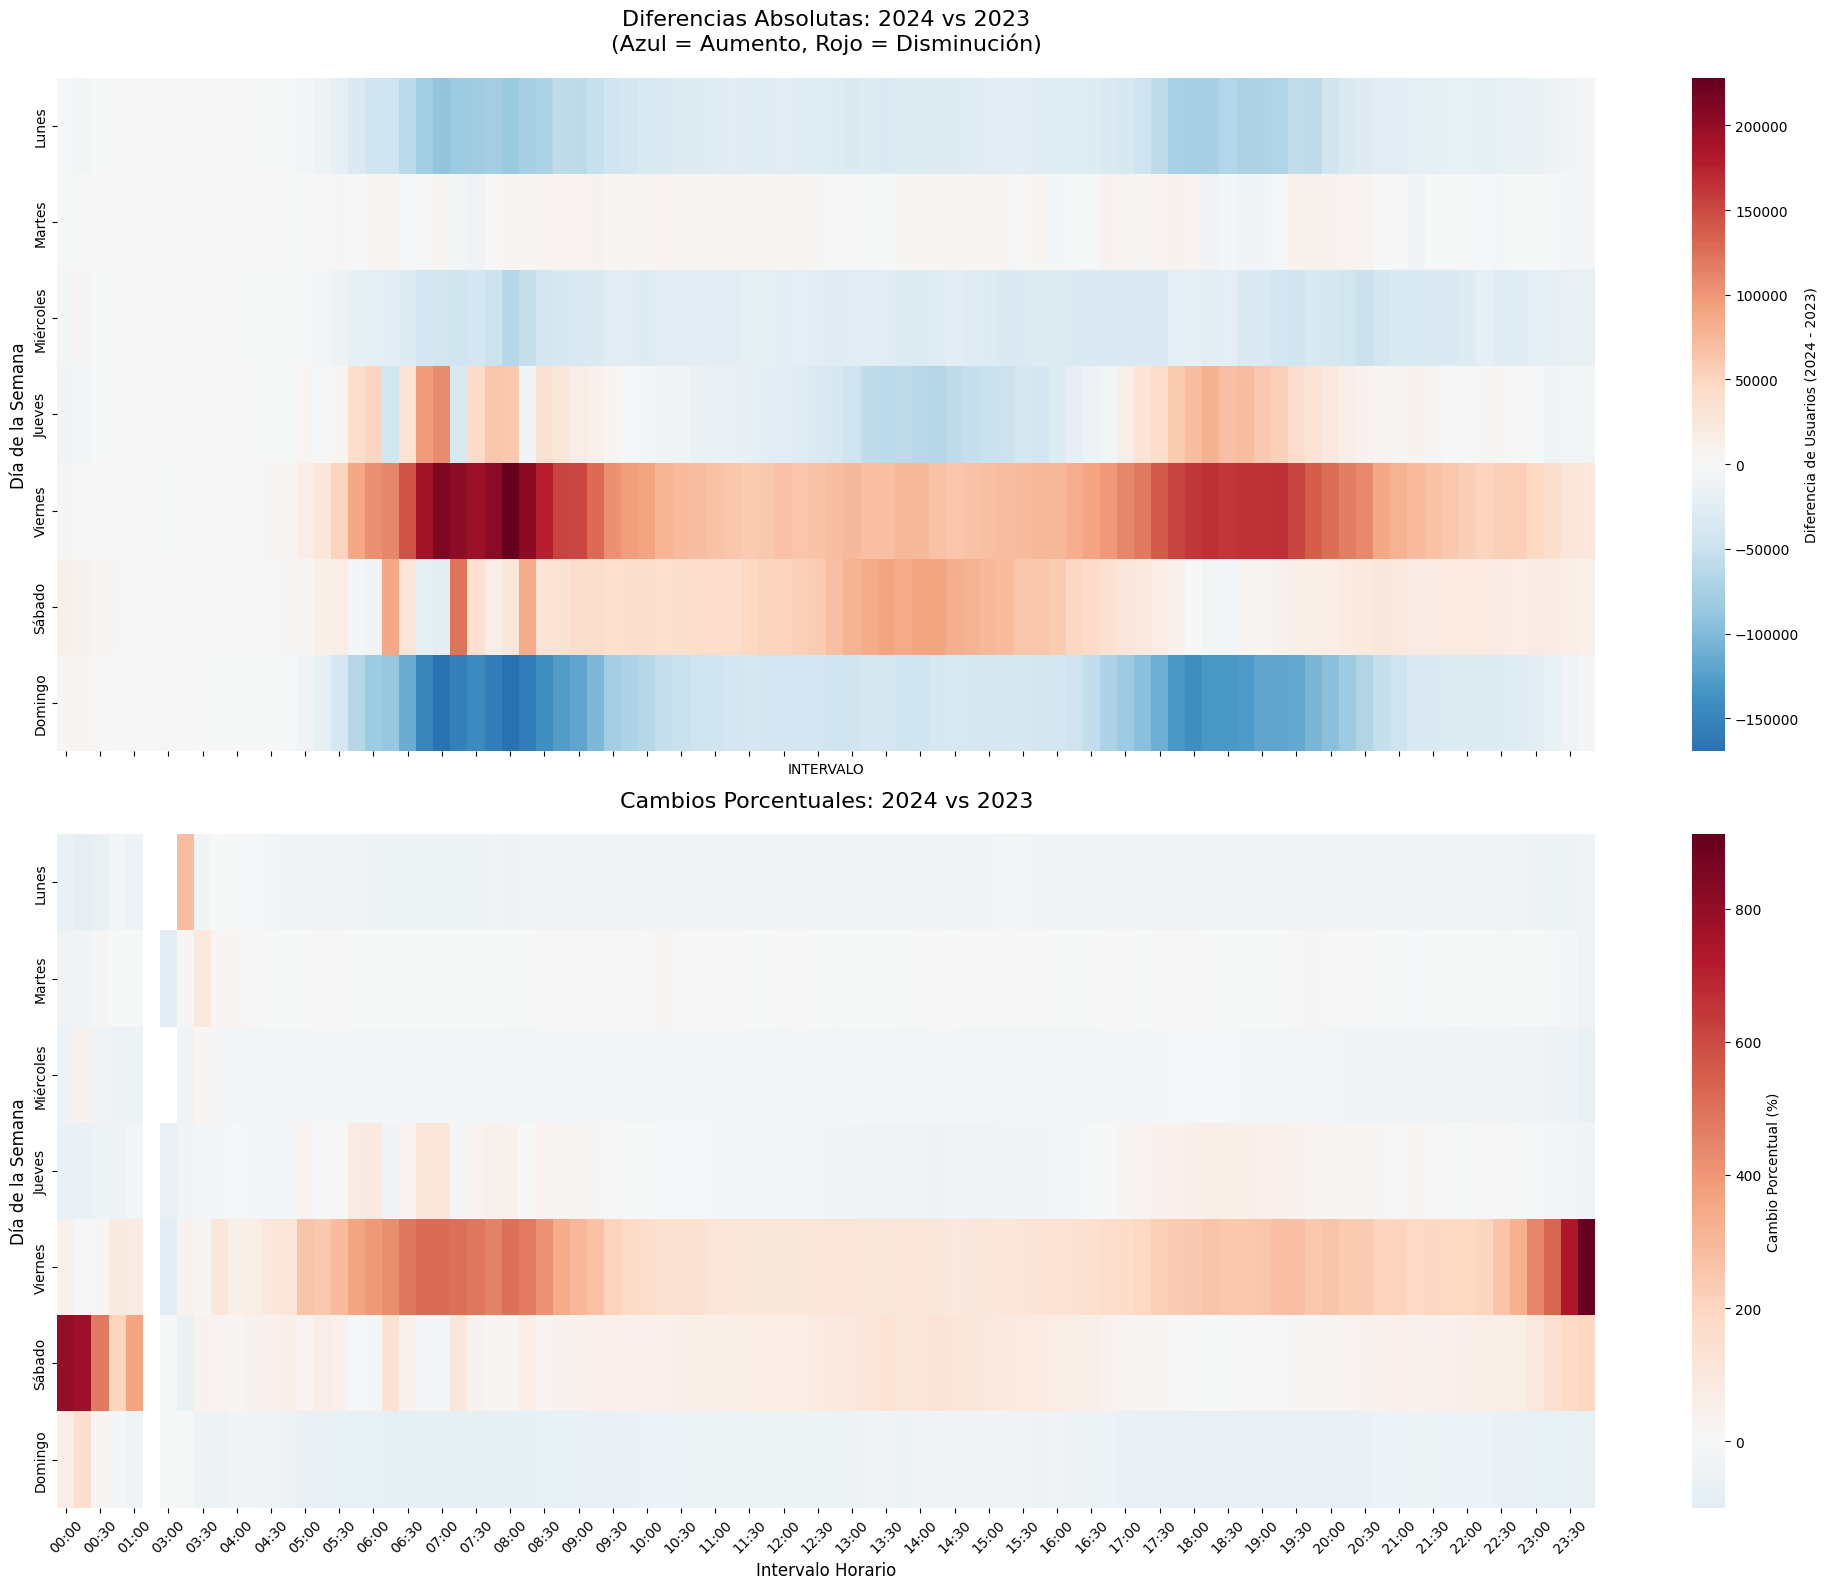

=== ESTAD√çSTICAS GENERALES DE LA DIFERENCIA (2024 - 2023) ===
Diferencia total de usuarios: -0
Diferencia promedio por intervalo: -0.00
Mayor aumento en un intervalo: 228,159 usuarios
Mayor disminuci√≥n en un intervalo: -169,436 usuarios

=== PUNTOS ESPEC√çFICOS CON MAYORES CAMBIOS ===
üìà MAYOR AUMENTO: 228,159 usuarios
   ‚û§ D√≠a: Viernes, Intervalo: 08:00
üìâ MAYOR DISMINUCI√ìN: -169,436 usuarios
   ‚û§ D√≠a: Domingo, Intervalo: 08:00

=== TOP INTERVALOS CON MAYORES CAMBIOS ABSOLUTOS ===

Top 10 intervalos con mayor VARIACI√ìN (cambios absolutos):
 1. üìâ 07:15: 650,728 (neto: -0)
 2. ‚û°Ô∏è 07:00: 649,323 (neto: +0)
 3. ‚û°Ô∏è 08:00: 638,963 (neto: +0)
 4. ‚û°Ô∏è 08:15: 587,058 (neto: +0)
 5. ‚û°Ô∏è 06:45: 580,435 (neto: +0)
 6. üìâ 07:45: 568,242 (neto: -0)
 7. ‚û°Ô∏è 07:30: 551,264 (neto: +0)
 8. ‚û°Ô∏è 08:30: 499,718 (neto: +0)
 9. ‚û°Ô∏è 18:15: 495,207 (neto: +0)
10. ‚û°Ô∏è 18:45: 478,473 (neto: +0)

Top 5 intervalos con mayor AUMENTO neto:

Top 5 intervalos con mayor DIS

In [28]:
# === HEATMAP DIFERENCIA 2024-2023 MEJORADO ===

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# === Definir el orden correcto de los d√≠as de la semana ===
dias_orden = ['Lunes','Martes','Mi√©rcoles','Jueves','Viernes','S√°bado','Domingo']

# === Crear pivot tables para ambos a√±os con orden correcto ===
pivot_2023 = df_2023_long.pivot_table(
    index='DiaSemana',
    columns='INTERVALO',
    values='TotalUsuarios',
    aggfunc='sum'
).reindex(dias_orden)

pivot_2024 = df_2024_long.pivot_table(
    index='DiaSemana',
    columns='INTERVALO',
    values='TotalUsuarios',
    aggfunc='sum'
).reindex(dias_orden)

# === Calcular diferencias y porcentajes ===
pivot_diferencia = pivot_2024.subtract(pivot_2023, fill_value=0)
pivot_porcentaje = ((pivot_2024 - pivot_2023) / pivot_2023 * 100).replace([np.inf, -np.inf], 0)

# === VISUALIZACI√ìN MEJORADA ===
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 16))

# HEATMAP 1: Diferencias absolutas
sns.heatmap(
    pivot_diferencia,
    cmap='RdBu_r',
    center=0,
    annot=False,
    fmt='.0f',
    cbar_kws={'label': 'Diferencia de Usuarios (2024 - 2023)'},
    ax=ax1
)
ax1.set_title('Diferencias Absolutas: 2024 vs 2023\n(Azul = Aumento, Rojo = Disminuci√≥n)',
              fontsize=16, pad=20)
ax1.set_ylabel('D√≠a de la Semana', fontsize=12)
ax1.tick_params(axis='x', labelbottom=False)  # Ocultar labels del eje x en el primer gr√°fico

# HEATMAP 2: Diferencias porcentuales
sns.heatmap(
    pivot_porcentaje,
    cmap='RdBu_r',
    center=0,
    annot=False,
    fmt='.1f',
    cbar_kws={'label': 'Cambio Porcentual (%)'},
    ax=ax2
)
ax2.set_title('Cambios Porcentuales: 2024 vs 2023', fontsize=16, pad=20)
ax2.set_ylabel('D√≠a de la Semana', fontsize=12)
ax2.set_xlabel('Intervalo Horario', fontsize=12)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# === AN√ÅLISIS ESTAD√çSTICO MEJORADO ===
print("=== ESTAD√çSTICAS GENERALES DE LA DIFERENCIA (2024 - 2023) ===")
diferencia_total = pivot_diferencia.sum().sum()
print(f"Diferencia total de usuarios: {diferencia_total:,.0f}")
print(f"Diferencia promedio por intervalo: {pivot_diferencia.mean().mean():,.2f}")
print(f"Mayor aumento en un intervalo: {pivot_diferencia.max().max():,.0f} usuarios")
print(f"Mayor disminuci√≥n en un intervalo: {pivot_diferencia.min().min():,.0f} usuarios")

# === ENCONTRAR LOS PUNTOS EXACTOS DE MAYOR CAMBIO ===
print("\n=== PUNTOS ESPEC√çFICOS CON MAYORES CAMBIOS ===")

# Encontrar m√°ximo aumento
max_pos = pivot_diferencia.stack().idxmax()
max_val = pivot_diferencia.stack().max()
print(f"üìà MAYOR AUMENTO: {max_val:,.0f} usuarios")
print(f"   ‚û§ D√≠a: {max_pos[0]}, Intervalo: {max_pos[1]}")

# Encontrar m√°xima disminuci√≥n
min_pos = pivot_diferencia.stack().idxmin()
min_val = pivot_diferencia.stack().min()
print(f"üìâ MAYOR DISMINUCI√ìN: {min_val:,.0f} usuarios")
print(f"   ‚û§ D√≠a: {min_pos[0]}, Intervalo: {min_pos[1]}")

# === AN√ÅLISIS POR INTERVALOS (valores absolutos para evitar cancelaciones) ===
print("\n=== TOP INTERVALOS CON MAYORES CAMBIOS ABSOLUTOS ===")

# Calcular cambios absolutos por intervalo
cambios_abs_intervalo = pivot_diferencia.abs().sum(axis=0).sort_values(ascending=False)
cambios_netos_intervalo = pivot_diferencia.sum(axis=0).sort_values(ascending=False)

print("\nTop 10 intervalos con mayor VARIACI√ìN (cambios absolutos):")
for i, (intervalo, cambio_abs) in enumerate(cambios_abs_intervalo.head(10).items(), 1):
    cambio_neto = cambios_netos_intervalo[intervalo]
    tendencia = "üìà" if cambio_neto > 0 else "üìâ" if cambio_neto < 0 else "‚û°Ô∏è"
    print(f"{i:2}. {tendencia} {intervalo}: {cambio_abs:,.0f} (neto: {cambio_neto:+,.0f})")

print("\nTop 5 intervalos con mayor AUMENTO neto:")
for i, (intervalo, cambio) in enumerate(cambios_netos_intervalo.head().items(), 1):
    if cambio > 0:
        print(f"{i}. üìà {intervalo}: {cambio:+,.0f} usuarios")

print("\nTop 5 intervalos con mayor DISMINUCI√ìN neta:")
aumentos_ordenados = cambios_netos_intervalo.tail()[::-1]  # Invertir para mostrar las mayores disminuciones primero
for i, (intervalo, cambio) in enumerate(aumentos_ordenados.items(), 1):
    if cambio < 0:
        print(f"{i}. üìâ {intervalo}: {cambio:,.0f} usuarios")

# === AN√ÅLISIS POR D√çA DE LA SEMANA ===
print("\n=== CAMBIOS POR D√çA DE LA SEMANA ===")
cambios_por_dia = pivot_diferencia.sum(axis=1)
cambios_abs_por_dia = pivot_diferencia.abs().sum(axis=1)

for dia in dias_orden:
    cambio_neto = cambios_por_dia[dia]
    cambio_abs = cambios_abs_por_dia[dia]
    status = "üìà" if cambio_neto > 0 else "üìâ" if cambio_neto < 0 else "‚û°Ô∏è"
    print(f"{status} {dia:10}: {cambio_neto:+8,.0f} usuarios neto ({cambio_abs:8,.0f} variaci√≥n total)")

# === AN√ÅLISIS DE HORARIOS PICO ===
print("\n=== AN√ÅLISIS DE HORARIOS ESPEC√çFICOS ===")

# Definir horarios de inter√©s
horarios_pico = {
    'Madrugada (04:00-06:59)': [f"{h:02d}:{m:02d}" for h in range(4, 7) for m in [0, 15, 30, 45]],
    'Pico Ma√±ana (07:00-09:59)': [f"{h:02d}:{m:02d}" for h in range(7, 10) for m in [0, 15, 30, 45]],
    'Media Ma√±ana (10:00-11:59)': [f"{h:02d}:{m:02d}" for h in range(10, 12) for m in [0, 15, 30, 45]],
    'Almuerzo (12:00-14:59)': [f"{h:02d}:{m:02d}" for h in range(12, 15) for m in [0, 15, 30, 45]],
    'Tarde (15:00-17:59)': [f"{h:02d}:{m:02d}" for h in range(15, 18) for m in [0, 15, 30, 45]],
    'Pico Tarde (18:00-20:59)': [f"{h:02d}:{m:02d}" for h in range(18, 21) for m in [0, 15, 30, 45]],
    'Noche (21:00-23:59)': [f"{h:02d}:{m:02d}" for h in range(21, 24) for m in [0, 15, 30, 45]]
}

for periodo, intervalos in horarios_pico.items():
    # Filtrar intervalos que existen en los datos
    intervalos_existentes = [i for i in intervalos if i in pivot_diferencia.columns]
    if intervalos_existentes:
        cambio_periodo = pivot_diferencia[intervalos_existentes].sum().sum()
        status = "üìà" if cambio_periodo > 0 else "üìâ" if cambio_periodo < 0 else "‚û°Ô∏è"
        print(f"{status} {periodo:25}: {cambio_periodo:+8,.0f} usuarios")

print("\n" + "="*80)
print("INTERPRETACI√ìN:")
if diferencia_total > 0:
    print(f"‚úÖ El sistema tuvo un AUMENTO neto de {diferencia_total:,.0f} usuarios en 2024 vs 2023")
elif diferencia_total < 0:
    print(f"üìâ El sistema tuvo una DISMINUCI√ìN neta de {abs(diferencia_total):,.0f} usuarios en 2024 vs 2023")
else:
    print("‚û°Ô∏è El sistema mantuvo pr√°cticamente el mismo n√∫mero de usuarios entre a√±os")
print("="*80)